In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#importing dependencies
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import style
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

## **Reading the Cleaned Dataset**

In [3]:
df=pd.read_csv("/content/drive/MyDrive/capstone project data/Beautyy.csv")
df.head(3)

,Product_id,description,title,imUrl,salesRank,categories,price,related,brand,reviewerID,...,reviewTime,sentiment,Helpful,Not_helpful,helpful_rate,neg,neu,pos,polarity,word_count
0,B001HSXTU2,Revlon Calcium Gel Nail Hardener instantly bon...,"Revlon Calcium Gel Nail Hardener, 0.5 Ounce",http://ecx.images-amazon.com/images/I/31lrZB5z...,33974,"[['Beauty', 'Skin Care', 'Hands & Nails', 'Nai...",7.49,"{'also_bought': ['B001KYW2OC', 'B004K0HEFA', '...",Revlon,AIS68CKHUUQ3B,...,2012-10-16,Negative,2,0,1.00,0.00,0.952,0.048,0.4019,60
1,B009DU4QYE,The Formula/Benefits: Safe and Effective Treat...,"Shampoo for Oily, Itchy &amp; Greasy Hair with...",http://ecx.images-amazon.com/images/I/31a9vMfc...,5126,"[['Beauty', 'Hair Care', 'Shampoos']]",18.00,"{'also_bought': ['B00B5S9CTG', 'B00L1KFQKC', '...",Maple Holistics,A3TXIN5QWZMHCH,...,2013-07-19,Negative,1,3,0.25,0.12,0.823,0.057,-0.8013,96
2,B00BPARRTQ,"High temperature silk, be able to endure tempe...",Gorgeous Long Curly Clip-on Hair Extension Wig...,http://ecx.images-amazon.com/images/I/51eRHdeB...,15527,"[['Beauty', 'Hair Care', 'Styling Products', '...",8.49,"{'also_bought': ['B00B1OP00E', 'B00FOLPOY2', '...",wwii101,A17UV8N9SZ6DJV,...,2014-05-18,Negative,0,0,0.00,0.15,0.850,0.000,-0.3673,25


In [4]:
df.isnull().sum()

Product_id            0
description       25698
title                 0
imUrl                 0
salesRank             0
categories            0
price                 0
related               0
brand                 2
reviewerID            0
reviewerName         30
reviewText           69
overall               0
summary               3
unixReviewTime        0
reviewTime            0
sentiment             0
Helpful               0
Not_helpful           0
helpful_rate          0
neg                   0
neu                   0
pos                   0
polarity              0
word_count            0
dtype: int64

<font color='sienna'> **As we converted the data to csv some empty strings were converted to null values as the number of null values is very less we will drop the values**.

In [5]:
df.drop('description',axis=1,inplace=True)

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Product_id        0
title             0
imUrl             0
salesRank         0
categories        0
price             0
related           0
brand             0
reviewerID        0
reviewerName      0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
sentiment         0
Helpful           0
Not_helpful       0
helpful_rate      0
neg               0
neu               0
pos               0
polarity          0
word_count        0
dtype: int64

In [8]:
def overview(df):
    print('\033[1;36mINITIAL DATASET OVERVIEW\033[0m')
    print('\033[1;3m1. Number of records:\033[0m',df.shape[0])
    print(' — — — — -')
    print('\033[1;3m2. Number of features:\033[0m', df.shape[1])
    print(' — — — — -')
    print('\033[1;3m3. Basic overview:\033[0m')
    print(df.info())
    print(' — — — — -')
    print('\033[1;3m4. Statistical summary:\033[0m\n',df.describe())
    print(' — — — — -')
    print('\033[1;3m5. Data types:\033[0m\n', df.dtypes)
    print(' — — — — -')
    print('\033[1;3m6. First 5 records:\033[0m\n',df.head())
    print(' — — — — -')
    print('\033[1;3m7. Last 5 records:\033[0m\n', df.tail())

In [9]:
overview(df)

INITIAL DATASET OVERVIEW
1. Number of records: 428945
 — — — — -
2. Number of features: 24
 — — — — -
3. Basic overview:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 428945 entries, 0 to 429048
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Product_id      428945 non-null  object 
 1   title           428945 non-null  object 
 2   imUrl           428945 non-null  object 
 3   salesRank       428945 non-null  int64  
 4   categories      428945 non-null  object 
 5   price           428945 non-null  float64
 6   related         428945 non-null  object 
 7   brand           428945 non-null  object 
 8   reviewerID      428945 non-null  object 
 9   reviewerName    428945 non-null  object 
 10  reviewText      428945 non-null  object 
 11  overall         428945 non-null  float64
 12  summary         428945 non-null  object 
 13  unixReviewTime  428945 non-null  int64  
 14  reviewTime      428945 non-

# Logistic Regression with ovr

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.multiclass import OneVsRestClassifier 
from sklearn.metrics import classification_report
import time
from sklearn.model_selection import train_test_split

In [13]:
tfidf_vectorizer = TfidfVectorizer()


In [14]:
X= tfidf_vectorizer.fit_transform(df['reviewText'])
Y =(df['sentiment'])

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,stratify=Y ,random_state=42)

In [20]:
print("X_train n_samples: %d, n_features: %d" % x_train.shape)
print("X_test n_samples: %d, n_features: %d" % x_test.shape)

X_train n_samples: 343156, n_features: 109679
X_test n_samples: 85789, n_features: 109679


In [21]:
t1= time.time()
lr = LogisticRegression(max_iter=200, verbose=1)
ovr = OneVsRestClassifier(lr)

# fit the model on the training data
ovr.fit(x_train, y_train)

 # predictions for test set
y_pred = ovr.predict(x_test)
ttime = round(time.time()-t1, 3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   38.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.7s finished


In [22]:
print("Time for modelling",ttime , "secs")

#evaluation metrics

print("\033[1;3m\nclassification_report:\033[0m\n\n",classification_report(y_test,y_pred))

Time for modelling 119.525 secs

classification_report:

               precision    recall  f1-score   support

    Negative       0.76      0.68      0.72     12426
     Neutral       0.51      0.16      0.25      7279
    Positive       0.89      0.97      0.93     66084

    accuracy                           0.86     85789
   macro avg       0.72      0.61      0.63     85789
weighted avg       0.84      0.86      0.84     85789



In [ ]:
!pip install scikit-plot

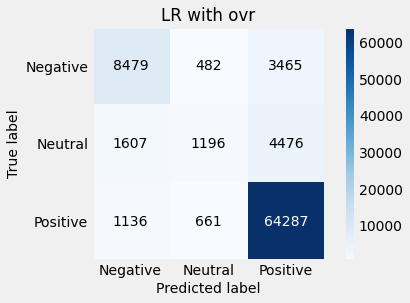

In [25]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_confusion_matrix(y_test, y_pred, title = 'LR with ovr')
plt.show()

In [26]:
def user_input(review):
    reviews_new=[review]
    reviews_new_tfidf = tfidf_vectorizer.transform(reviews_new)
    pred = ovr.predict(reviews_new_tfidf)
    return pred

In [27]:
review_input=input("Enter any string to check the sentiment: ")
print(user_input(review_input))

Enter any string to check the sentiment: bad product
['Negative']


#Interpretation:

- For classification, we used logistic regression as it is easier to implement, interpret, and very efficient to train.
- The dataset was huge in size so trying ensemble methods was of no use, tried using SVC but it also required more time to run.
- We get accuracy score as 86 % so we can use this model for predicting the sentiments of the customer reviews.